In [14]:
# # csv파일을 불러오는 방법 1번째 - open함수 사용
# import re,os,sys,csv
# import pandas as pd
# import matplotlib.pyplot as plt

# os.chdir('C:/test/한국가스공사 외국인보유 5년')
# df = pd.DataFrame()

# def opencsv(filename):
#     with open(filename,mode='r',encoding='cp949',newline='') as f:
#         reader = csv.reader(f) # 읽어올 때 리스트형태로 받는다.
#         output = []
#         for i in reader:
#             output.append(i)
#     return output

# for file in os.listdir():
    
#     if re.match(r'data_\d{6}_\d{6}.csv',file):
#     # print(file)
#         df = pd.concat([df,pd.DataFrame(opencsv(file))])

In [109]:
# csv파일을 불러오는 방법 1번째 - pd.read_csv를 사용한다.
import re,os,sys,csv
import pandas as pd
import matplotlib.pyplot as plt

stockname = os.getcwd().split('\\')[2].split()[0]
stockname

plt.rcParams['font.family']='Malgun Gothic' # 차트에서 한글 깨짐 방지
plt.rcParams['axes.unicode_minus'] = False  # 차트에서 -기호 깨짐 방지

os.chdir('C:/test/한국가스공사 외국인보유 5년')
df_all = pd.DataFrame()

for file in os.listdir():
    if re.match(r'data_\d{6}_\d{6}.csv',file):
        df = pd.read_csv(file,thousands=',',encoding='cp949')
        df_all = pd.concat([df_all,df])


In [110]:
df_all = df_all[['일자','외국인 지분율','종가']]
df_all.sort_values(by='일자',axis=0,ascending=True,inplace=True)

year = []
month = []
for i in df_all['일자'].values:
    year.append(i[:4])
    month.append(i[2:4]+i[5:7])
df_all['년도'] = year # 2018,2019,2020 ...
df_all['년월'] = month # 1807,1808, ... 2306, 2307

df_all = df_all[['년도','년월','일자','외국인 지분율','종가']]
df_all.columns = ['년도','년월','일자','외국인 지분율(%)','종가']
df_by_year = df_all.groupby('년도').mean()


avgstake_by_year = df_all.groupby('년도').mean()['외국인 지분율(%)'].values
avgstake_by_month = df_all.groupby('년월').mean()['외국인 지분율(%)'].values

avgstock_by_year = df_all.groupby('년도').mean()['종가'].values
avgstock_by_month = df_all.groupby('년월').mean()['종가'].values

In [111]:
# df_by_year.values가 y값으로 가고 해당 년도의 중간 날짜를 x값으로 설정한다.
def find_date(one,another):
    # df_by_month = df_all.groupby('년월').mean()
    list =[]
    index = []

    count_data = df_all.groupby(one).count() # 년도

    for i in count_data[another]: # 년월
        list.append(i)
    list.insert(0,0)
    sum = 0
    for i in range(len(list)-1):
        sum+=list[i]
        
        num = sum + int(round(list[i+1]/2)) # 11번째/33번째
        # print(sum,num)
        index.append(num-1)

    date = df_all.iloc[index]['일자'].values
    return date

avgdate_by_year = find_date('년도','년월')
avgdate_by_month = find_date('년월','년도')


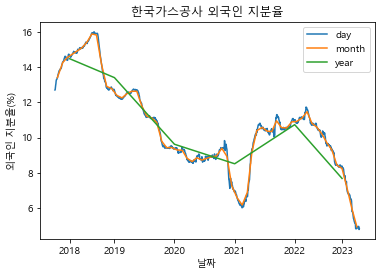

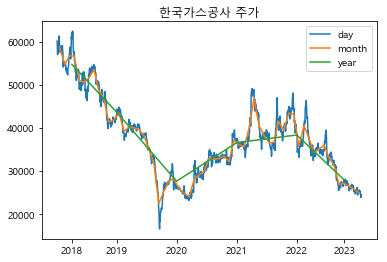

In [112]:
figure1 = plt.figure()
figure1.set_facecolor('white')
plt.title(f'{stockname} 외국인 지분율')
x1 = df_all['일자'].values
y1 = df_all['외국인 지분율(%)'].values
x2 = avgdate_by_month
y2 = avgstake_by_month
x3 = avgdate_by_year
y3 = avgstake_by_year
plt.plot(x1,y1,label = 'day')
plt.plot(x2,y2,label = 'month')
plt.plot(x3,y3,label = 'year')
plt.xticks(x3,['2018','2019','2020','2021','2022','2023'])
plt.xlabel('날짜')
plt.ylabel('외국인 지분율(%)')
plt.legend()
plt.rcParams['font.family'] = 'Malgun Gothic' # 모든 데이터 폰트 기본값 지정



# ========================================================================================================
figure2 = plt.figure()
figure2.set_facecolor('white')
plt.title(f'{stockname} 주가')
a1 = df_all['일자'].values
b1 = df_all['종가'].values
a2 = avgdate_by_month
b2 = avgstock_by_month
a3 = avgdate_by_year
b3 = avgstock_by_year
plt.plot(a1,b1,label = 'day')
plt.plot(a2,b2,label = 'month')
plt.plot(a3,b3,label = 'year')
plt.xticks(avgdate_by_year,['2018','2019','2020','2021','2022','2023'])
plt.legend()
plt.show()

In [115]:
# ============================== 방법 ============================================
# import chart_studio.plotly as py
# import cufflinks as cf
# cf.go_offline(connected=True)

# abc = df_all[['일자','외국인 지분율(%)','종가']]
# abc.set_index('일자',inplace=True)
# layout = {
#     'title' : '최근 5년 한국가스공사 외국인 지분율(%)과 주가',
#     'title_x': 0.5, # 제목 가운데 정렬을 위해 0.5로 설정 (0은 왼쪽, 1은 오른쪽)
    
# }

# abc.iplot(kind='line',layout=layout,secondary_y_title='y축')
# abc
# ==> 두 개의 Y축을 사용하여 그래프를 그릴 수 있습니다. 하지만 cufflinks 라이브러리에서는 두 개 이상의 Y축을 지원하지 않으며, 오른쪽 Y축의 스케일을 조정하는 기능도 제공하지 않습니다. 따라서 더 복잡한 Y축 설정이 필요한 경우에는 plotly.graph_objects를 사용하여 그래프를 그리는 것이 더 적합할 수 있습니다.

# =========================== 방법2 ===========================================
import plotly.graph_objects as go


abc = df_all[['일자','외국인 지분율(%)','종가']]
abc.set_index('일자',inplace=True)
fig = go.Figure()
fig.add_trace(go.Scatter(x=abc.index, y=abc['외국인 지분율(%)'], mode='lines', name='외국인 지분율(%)',yaxis='y1'))
fig.add_trace(go.Scatter(x=abc.index, y=abc['종가'], mode='lines', name='주가', yaxis='y2'))


fig.update_layout(title_x = 0.5,title_y = 0.9,
                title_xanchor = 'center',title_yanchor = 'middle',
                  title=f'최근 5년 {stockname} 외국인 지분율(%)과 주가', 
                  xaxis_title='일자', yaxis_title='외국인 지분율(%)', 
                  yaxis2=dict(title='주가', overlaying='y', side='right'))
fig.show()
